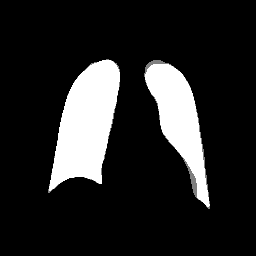

In [3]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


def overlapMask(model_name):
    # Get Array Image =
    image_to_predict = img_to_array(load_img('./sample_images/image_to_predict.bmp', color_mode='grayscale', target_size=(256, 256))).astype('float32')/255.0
    gt_image = np.squeeze(img_to_array(load_img('./sample_images/ground_truth.bmp', color_mode='grayscale', target_size=(256, 256))).astype('float32'))/255.0
    # Reshape to model.predict
    image_arr_reshape = image_to_predict[np.newaxis, ...]
    # Load Model
    model = tf.keras.models.load_model('./models/{}/{}.h5'.format(model_name, model_name), compile=False)
    # Get Segmentation (Predicted Images)
    mask_arr = model.predict(image_arr_reshape, verbose=0)
    # To Binary
    gt_image = (gt_image > 0.5).astype('float32')
    mask_arr = (mask_arr > 0.5).astype('float32')
    # Reduce The Dimension
    mask_arr = np.squeeze(mask_arr)
    # Overlap
    gt_image[gt_image != mask_arr] = 0.5
    return array_to_img(np.expand_dims(gt_image, axis=2))

overlapMask('UNet')
